In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, sin, exp
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from copy import copy
from numpy import sin, cos, pi
import random
%matplotlib inline

## Ex 1

Using the two monte carlo methods

In [3]:
# Pontos aleatórios e taxa de aceitação
def montecarlo1(func, a0, a1, n_points=1000):
    # Area -> (a1-a0) * max(func)
    y = [func(i) for i in np.linspace(a0, a1, num=n_points)]
    y_max = max(y)

    area = (a1-a0) * y_max

    dentro = 0
    for _ in range(n_points):
        x_random = random.uniform(a0, a1)
        y_random = random.uniform(0, y_max)

        if y_random <= func(x_random):
            dentro += 1

    return (dentro/n_points) * area

In [4]:
montecarlo1(lambda x:sin(x), 0, pi )

1.941501859886448

In [5]:
montecarlo1(lambda x:exp(x), 0, 2.5 )

11.695194202275335

In [6]:
# Metodo da media dos pontos.
def montecarlo2(func, a0, a1, n_points=1000):   
   points = []
   for _ in range(n_points):
      x = random.uniform(a0, a1)
      points.append(func(x))

   return np.array(points).mean() * (a1-a0)

In [7]:
montecarlo2(lambda x:sin(x), 0, pi )

2.0151127955472723

In [8]:
montecarlo2(lambda x:exp(x), 0, 2.5 )

11.579419786253279

## Ex 2

In [9]:
from numpy.random import normal

In [10]:
def brownian(x0, n, dt, delta):
    # x0 vetor da pos inicial
    # n numero de passos a dar
    # dt time step
    # delta determina o speed do brownian motion

    x0 = np.array(x0)
    dim = x0.shape[0]

    # Inicializar out
    out = np.zeros(shape=(n, dim))
    out[0, :] = x0 # Colocar o 1º como sendo x0

    for i in range(1, n):
        out[i] = out[i-1] + normal(0, (delta**2)*dt, size=(dim,))

    return out

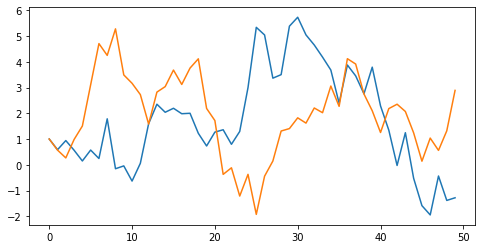

In [11]:
walk1 = brownian([1], 50, 1, 1)
walk2 = brownian([1], 50, 1, 1)
plt.figure(figsize=(8,4))
plt.plot(walk1)
plt.plot(walk2)
plt.show()

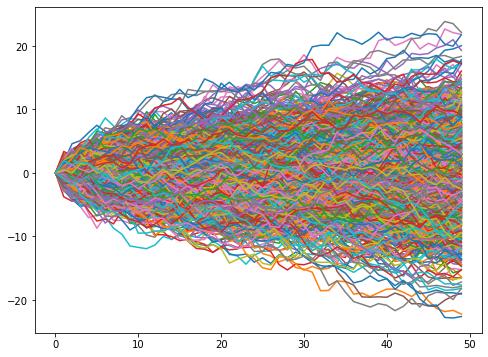

In [12]:
walk = brownian([0 for _ in range(1000)], 50, 1, 1)

plt.figure(figsize=(8,6))
plt.plot(walk)
plt.show()

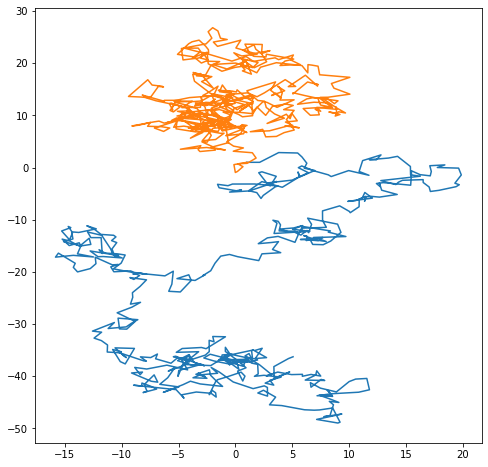

In [13]:
walk1 = brownian([1, 1], 500, 1, 1)
walk2 = brownian([1, 1], 500, 1, 1)

plt.figure(figsize=(8,8))
plt.plot(walk1[:,0], walk1[:,1])
plt.plot(walk2[:,0], walk2[:,1])
plt.show()

#### Ex 3 - TPC

#### Ex 4

In [14]:
time = np.array([0,1,2,3,4])
v = np.array([0., 0.308, 0.55, 0.546, 0.44])

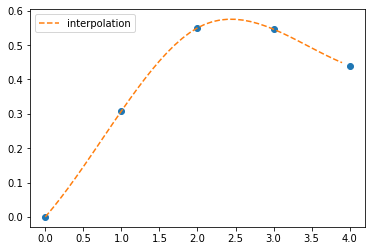

In [21]:
from scipy.interpolate import interp1d

# Gera a função de interpolacao aka da fit aos dados
f = interp1d(time, v, kind='cubic')

# New x, new ys for the interpolation graph
xnew = np.arange(time[0], time[-1], 0.1)
ynew = f(xnew) 

plt.plot(time, v, 'o')
plt.plot(xnew, ynew, '--', label='interpolation')
plt.legend()
plt.show()

Estima-se que a velocidade max tenha sido atingida em T=2.5s